In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load datasets and merge on by ID
survey_data = pd.read_csv('data/CSAT_Survey_Data.csv')
age_data = pd.read_csv('data/Customer_Age_Data.csv')
mrr_data = pd.read_csv('data/Customer_MRR_Data.csv')
revenue_data = pd.read_csv('data/Customer_Revenue_Data.csv')
ticket_data = pd.read_csv('data/Help_Ticket_Data.csv')
interaction_data = pd.read_csv('data/Newsletter_Interaction_Data.csv')
bugtask_data = pd.read_csv('data/Product_Bug_Task_Data.csv')
region_data = pd.read_csv('data/RegionAndVertical_Data.csv')
status_data = pd.read_csv('data/StatusAndLevel_Data.csv')

# change column name on age data
age_data.rename(columns={'CRM ID':'Customer ID','Customer Age (Months)':'Age'}, inplace=True)

# merge all datasets
df = pd.merge(survey_data, age_data, on='Customer ID')
df = pd.merge(df, mrr_data, on='Customer ID')
df = pd.merge(df, revenue_data, on='Customer ID')
df = pd.merge(df, ticket_data, on='Customer ID')
df = pd.merge(df, interaction_data, on='Customer ID')
df = pd.merge(df, bugtask_data, on='Customer ID')
df = pd.merge(df, region_data, on='Customer ID')
df = pd.merge(df, status_data, on='Customer ID')

# change dates to datetime
df["Survey Date"] = pd.to_datetime(df["Survey Date"])
df["Response Date"] = pd.to_datetime(df["Response Date"])

# split CRM- from the customer id
df['Customer ID'] = df['Customer ID'].apply(lambda x: x.split('CRM-')[1])

df.drop(columns=['Year'], inplace=True)

df.head()

,Customer ID,Quarter,Survey Date,Response Date,How likely are you to recommend insider to a friend or colleague,How would you rate the value you gain from our company,How frequently are you using our platform,Please rate the overall quality of our products,Please rate the usability of the panel,Please rate your understanding of our reporting capabilities in the panel,...,Total Revenue,Help Ticket Count,Help Ticket Lead Time (hours),Company Newsletter Interaction Count,Product Bug Task Count,Region,Vertical,Subvertical,Status,Customer Level
0,1470950,1,2022-01-01,2022-03-25,4,3,Once a Day,2,3.0,I need someone from Insider team to provide me...,...,"$732,199",30,366,3,160,Thailand,Retail,Marketplace,Retained,Enterprise
1,1470950,1,2022-01-01,2022-03-25,4,3,Once a Day,2,3.0,I need someone from Insider team to provide me...,...,"$732,199",30,366,3,191,Thailand,Retail,Marketplace,Retained,Enterprise
2,1470950,1,2022-01-01,2022-03-25,4,3,Once a Day,2,3.0,I need someone from Insider team to provide me...,...,"$732,199",30,366,3,119,Thailand,Retail,Marketplace,Retained,Enterprise
3,1470950,1,2022-01-01,2022-03-25,4,3,Once a Day,2,3.0,I need someone from Insider team to provide me...,...,"$732,199",30,366,3,49,Thailand,Retail,Marketplace,Retained,Enterprise
4,1470950,1,2022-01-01,2022-03-25,4,3,Once a Day,2,3.0,I need someone from Insider team to provide me...,...,"$732,199",30,366,3,151,Thailand,Retail,Marketplace,Retained,Enterprise


In [3]:
# analyze data
print(df.shape)
print(df.info())
print(df.describe())


(1745, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1745 entries, 0 to 1744
Data columns (total 22 columns):
 #   Column                                                                     Non-Null Count  Dtype         
---  ------                                                                     --------------  -----         
 0   Customer ID                                                                1745 non-null   object        
 1   Quarter                                                                    1745 non-null   int64         
 2   Survey Date                                                                1745 non-null   datetime64[ns]
 3   Response Date                                                              1745 non-null   datetime64[ns]
 4   How likely are you to recommend insider to a friend or colleague           1745 non-null   int64         
 5   How would you rate the value you gain from our company                     1745 non-null   int64    

In [4]:
# find null values
print(df.isnull().sum())

# drop null values
df.dropna(inplace=True)

Customer ID                                                                   0
Quarter                                                                       0
Survey Date                                                                   0
Response Date                                                                 0
How likely are you to recommend insider to a friend or colleague              0
How would you rate the value you gain from our company                        0
How frequently are you using our platform                                     4
Please rate the overall quality of our products                               0
Please rate the usability of the panel                                       89
Please rate your understanding of our reporting capabilities in the panel     0
Age                                                                           0
MRR                                                                           0
Total Revenue                           

In [5]:
df.rename(columns={'How likely are you to recommend insider to a friend or colleague ': 'Recommendation',
                   'How would you rate the value you gain from our company': 'Gain Rating',
                   'Please rate the overall quality of our products': 'Product Quality Rating',
                   'Please rate the usability of the panel': 'Panel Usability Rating',
                   'Please rate your understanding of our reporting capabilities in the panel': 'Report Understanding',
                    'How frequently are you using our platform': 'Use Frequent',
                    'Company Newsletter Interaction Count':'Newsletter Int Count',
                    'Help Ticket Lead Time (hours)':'Help time'}, inplace=True)
# get numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])

df_num.describe()


,Quarter,Recommendation,Gain Rating,Product Quality Rating,Panel Usability Rating,Age,Help Ticket Count,Help time,Newsletter Int Count,Product Bug Task Count
count,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000
mean,2.138753,8.476773,4.327628,4.260391,4.088631,50.846577,48.604523,828.686430,6.071516,143.794010
std,0.823026,1.641234,0.739614,0.754628,0.875123,17.304513,68.741465,452.870745,7.868360,37.483465
min,1.000000,1.000000,2.000000,0.000000,1.000000,10.000000,1.000000,12.000000,1.000000,9.000000
25%,1.000000,8.000000,4.000000,4.000000,4.000000,39.000000,11.000000,545.000000,2.000000,117.000000
50%,2.000000,9.000000,4.000000,4.000000,4.000000,54.000000,30.000000,766.000000,4.000000,150.000000
75%,3.000000,10.000000,5.000000,5.000000,5.000000,68.000000,66.000000,1109.000000,6.000000,174.000000
max,3.000000,10.000000,5.000000,5.000000,5.000000,72.000000,443.000000,3200.000000,54.000000,200.000000


In [6]:
print(df_num.shape)

(1636, 10)


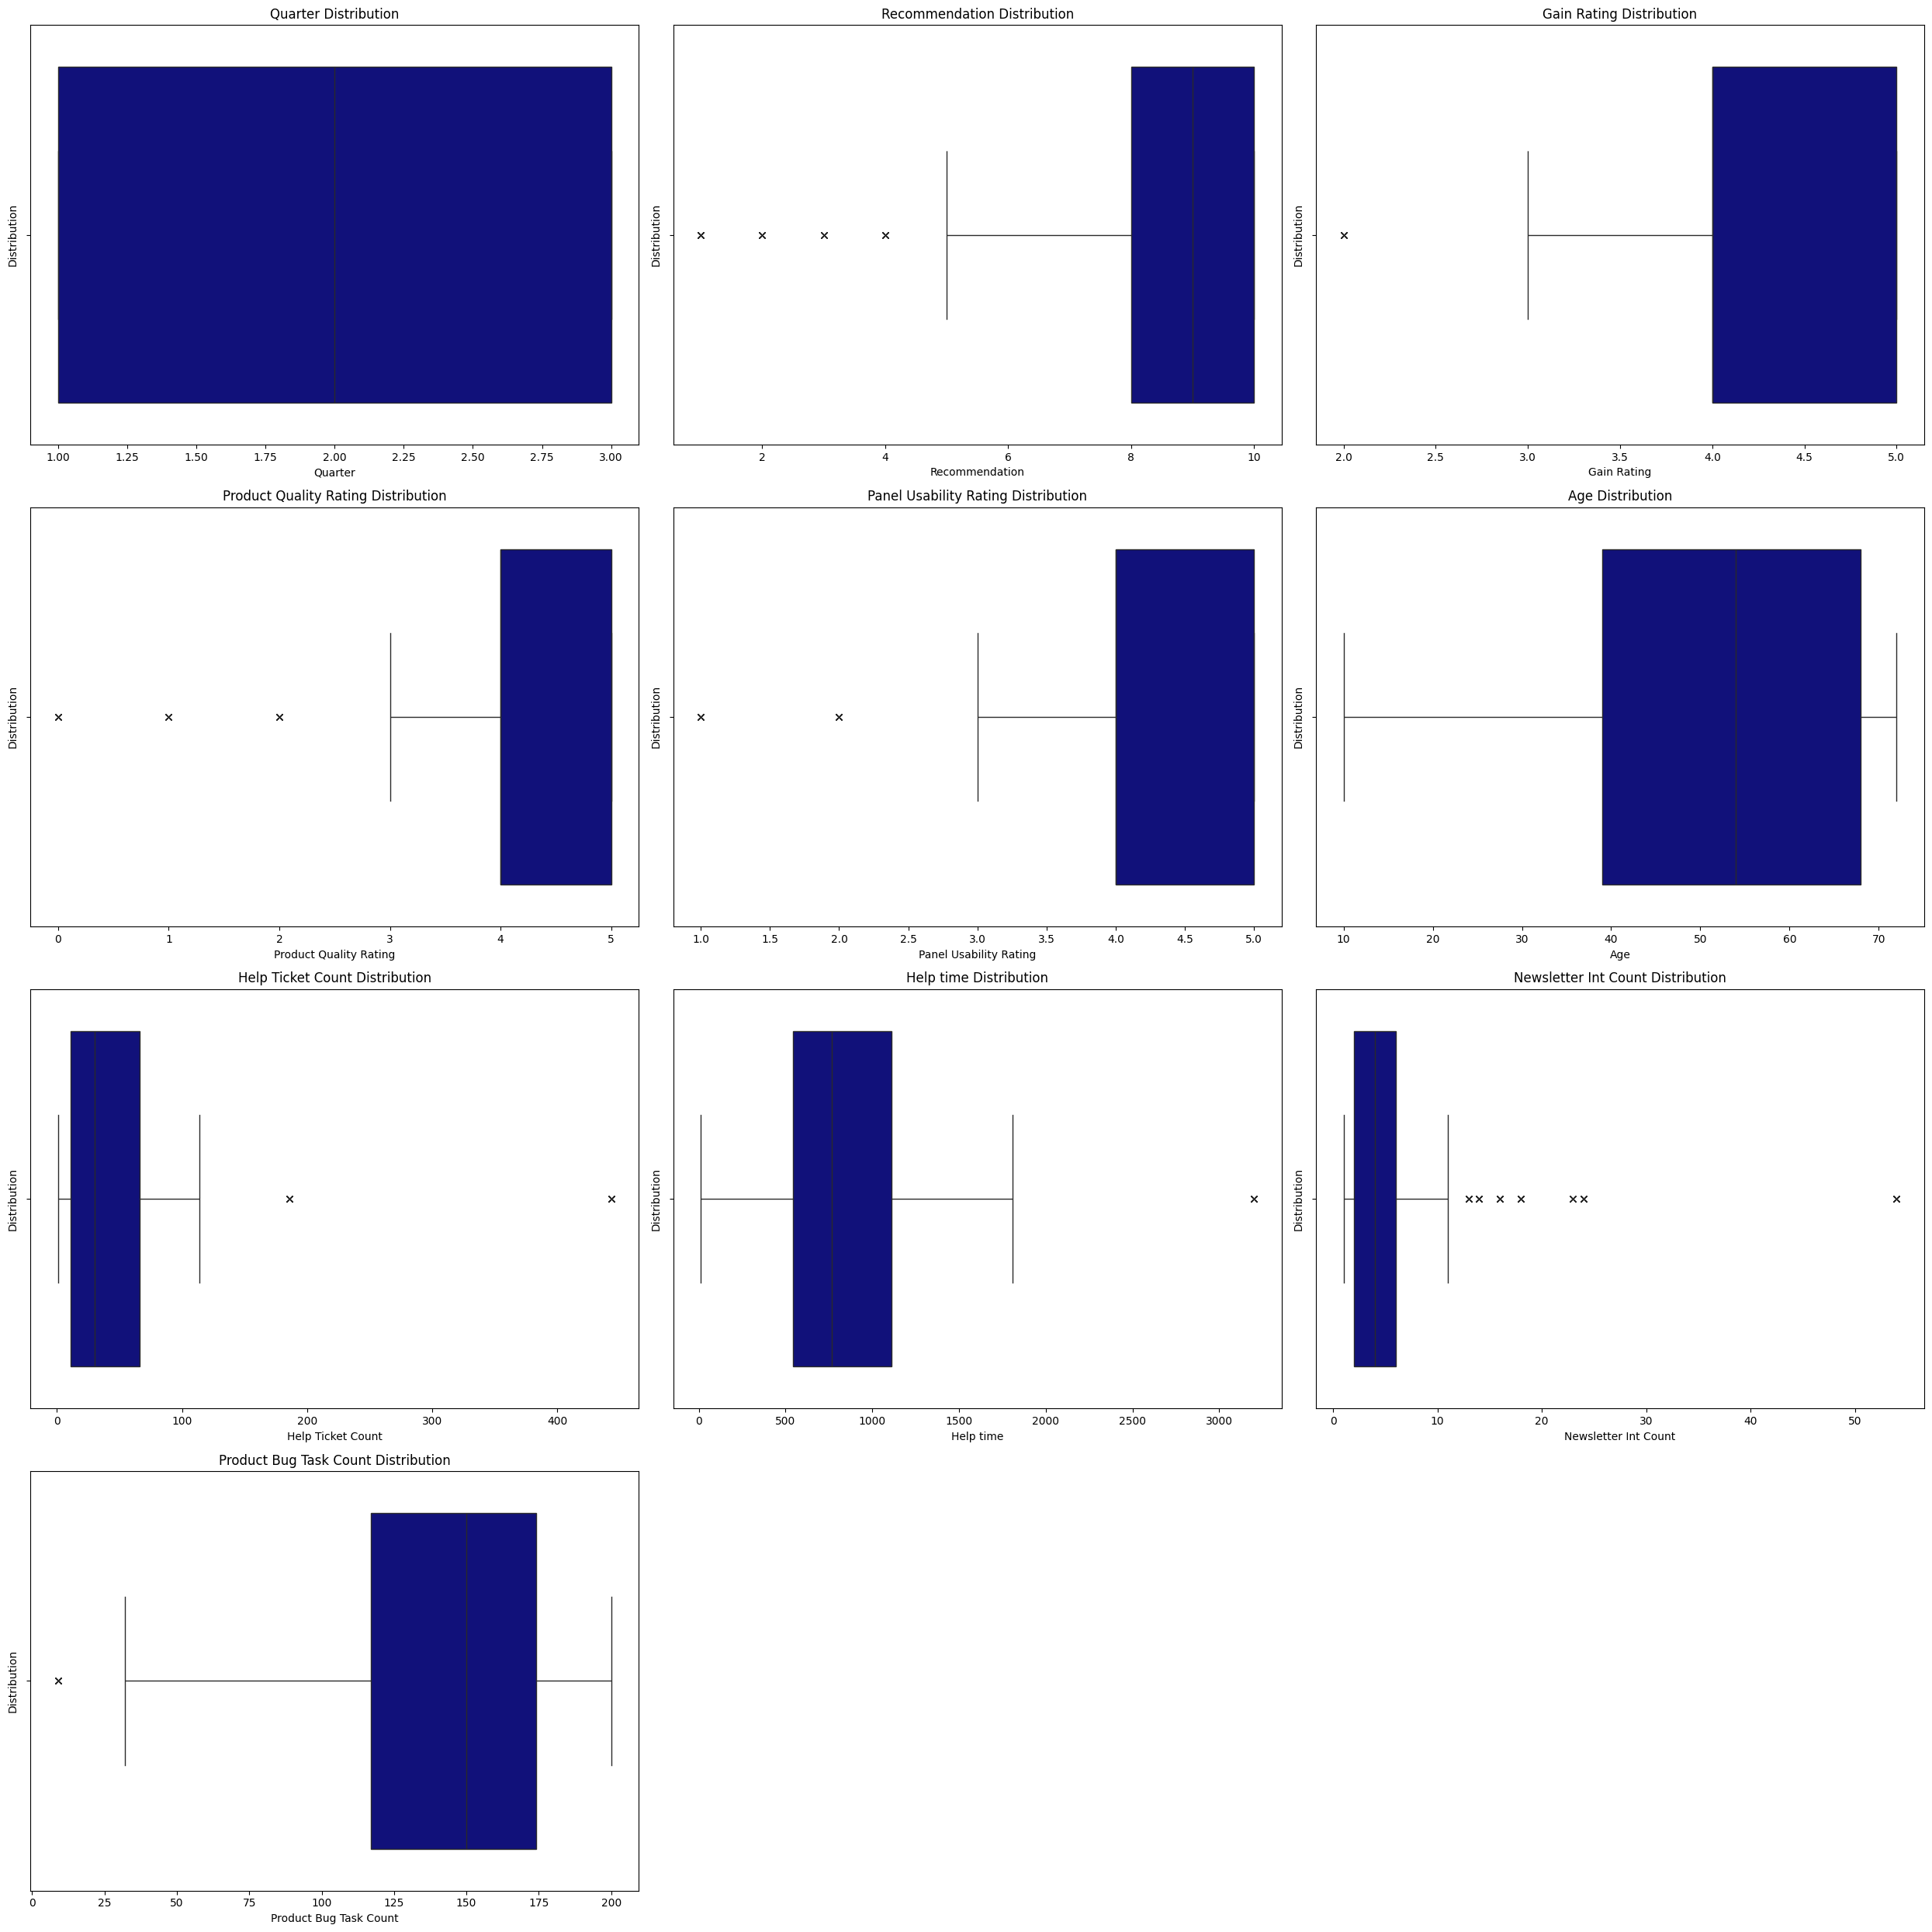

In [7]:
# Outliers boxplot
fig = plt.figure(figsize=(25, 25))
for i, col in enumerate(df_num.columns):
    ax = fig.add_subplot(4, 3, i+1)
    sns.boxplot(x = df_num[col].ffill(), 
                color='darkblue',
                flierprops={"marker": "x"})
    ax.set_title(col + " Distribution", color='k')
    plt.ylabel('Distribution')
fig.tight_layout()

In [8]:
# remove outliers with np.abs
from scipy import stats
df_num = df_num[(np.abs(stats.zscore(df_num)) < 3).all(axis=1)]

# shape 
df_num.shape

(1509, 10)

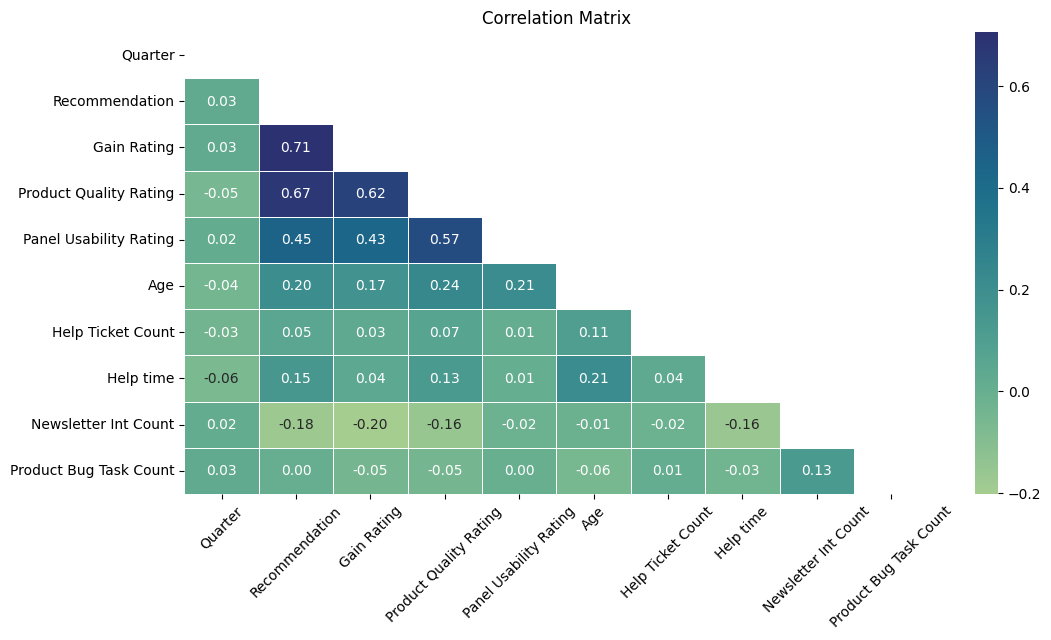

In [9]:
# correlation matrix
def sketch_corr(df):
    plt.figure(figsize=(12,6))
    mask = np.triu(df.corr())
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, 
                annot=True, 
                mask = mask, 
                cmap='crest', 
                fmt=".2f",
                linewidths=.5)
    plt.title('Correlation Matrix')
    plt.xticks(rotation=45)
    plt.show()

sketch_corr(df_num)


Use Frequent
Once a Day      958
Once a Week     443
Once a Month    235
Name: count, dtype: int64


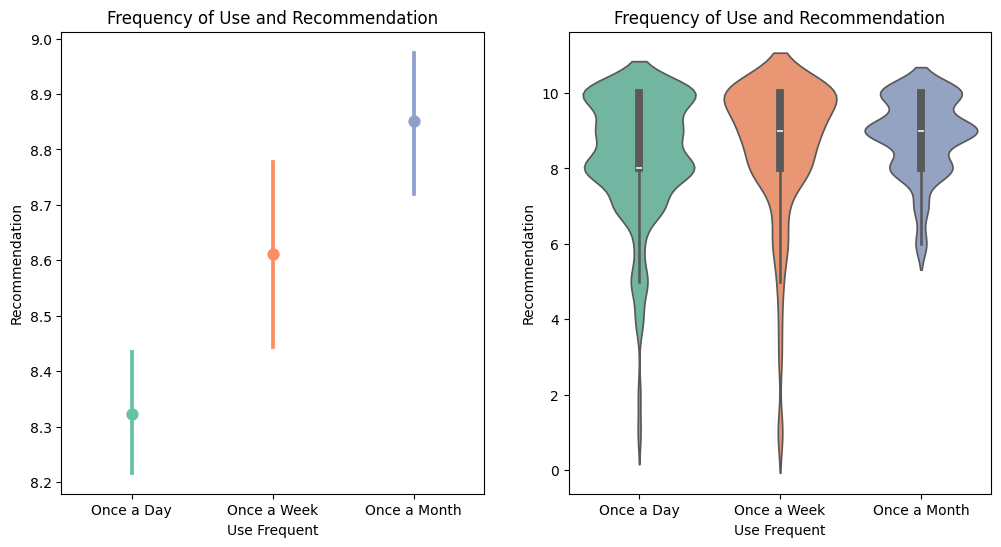

In [24]:
df['Use Frequent'].unique()
print(df['Use Frequent'].value_counts())

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].set_title('Frequency of Use and Recommendation')
axes[1].set_title('Frequency of Use and Recommendation')

# Pointplot
sns.pointplot(x="Use Frequent", 
            y="Recommendation", 
            data=df,
            ax=axes[0],
            hue='Use Frequent',
            palette='Set2')

#Violinplot
sns.violinplot(x="Use Frequent", 
            y="Recommendation", 
            data=df,
            ax=axes[1],
            inner='box',
            hue='Use Frequent',
            palette='Set2')
plt.show()


In [18]:
df['Report Understanding'].unique()
print(df['Report Understanding'].value_counts())

Report Understanding
I need someone from Insider team to provide me the report from the panel    539
I am able to report everything easily                                       457
I tried but could not find everything I need                                319
I don't use it often                                                        203
I can pull all the numbers, but don't understand them                       118
Name: count, dtype: int64


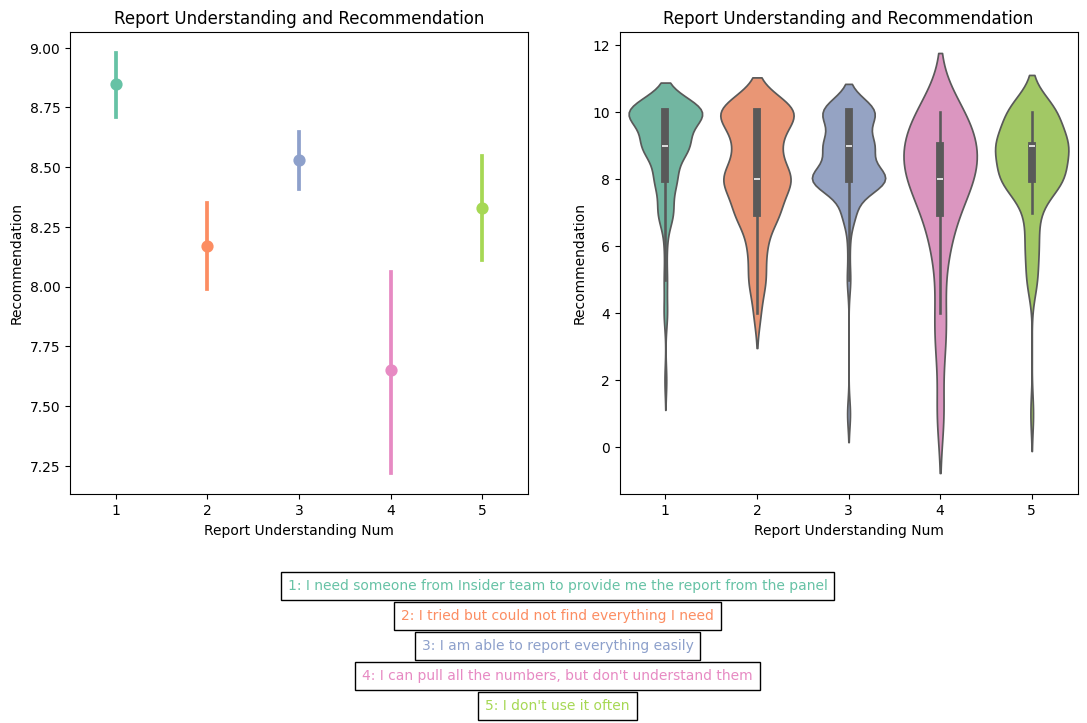

In [48]:
# Report Understanding vs Recommendation

category_mapping = {
    "I need someone from Insider team to provide me the report from the panel": "1",
    "I tried but could not find everything I need": "2",
    "I am able to report everything easily": "3",
    "I can pull all the numbers, but don't understand them": "4",
    "I don't use it often": "5"
}

df["Report Understanding Num"] = df["Report Understanding"].map(category_mapping)

fig, axes = plt.subplots(1, 2, figsize=(13, 6))
axes[0].set_title('Report Understanding and Recommendation')
axes[1].set_title('Report Understanding and Recommendation')

# Pointplot
sns.pointplot(x="Report Understanding Num", 
            y="Recommendation", 
            data=df,
            ax=axes[0],
            hue='Report Understanding Num',
            palette='Set2')

#Violinplot
sns.violinplot(x="Report Understanding Num", 
            y="Recommendation", 
            data=df,
            ax=axes[1],
            inner='box',
            hue='Report Understanding Num',
            palette='Set2')

colors = sns.color_palette("Set2", n_colors=len(category_mapping))
legend_x, legend_y = 0.5, -0.05 

for i, (desc, num) in enumerate(category_mapping.items()):
    plt.figtext(legend_x, legend_y - (i * 0.05), 
                f"{num}: {desc}", 
                ha="center", fontsize=10, 
                color=colors[i], 
                bbox={"facecolor": "white", "alpha": 1, "pad": 5})
plt.show()
